<a href="https://colab.research.google.com/github/Bengyjr/Bengyhse/blob/main/Housing%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
df = pd.read_csv("./Data/AAPL.csv", index_col='Date')

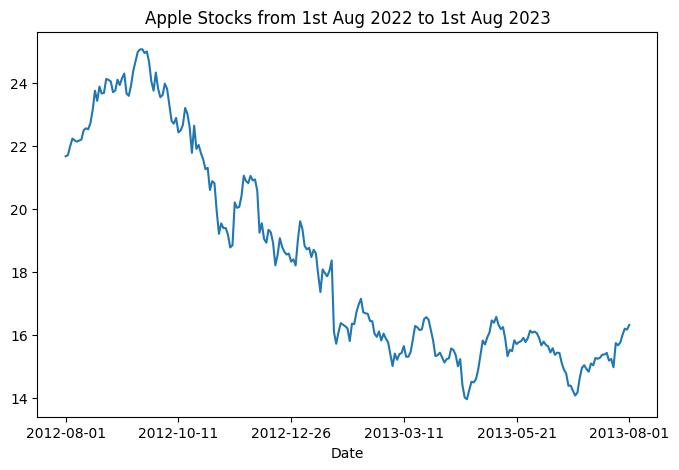

In [43]:
plt.figure(figsize=(8,5))
df.loc['2012-08-01':'2013-08-01', 'Close'].plot()
plt.title('Apple Stocks from 1st Aug 2022 to 1st Aug 2023')
plt.show()

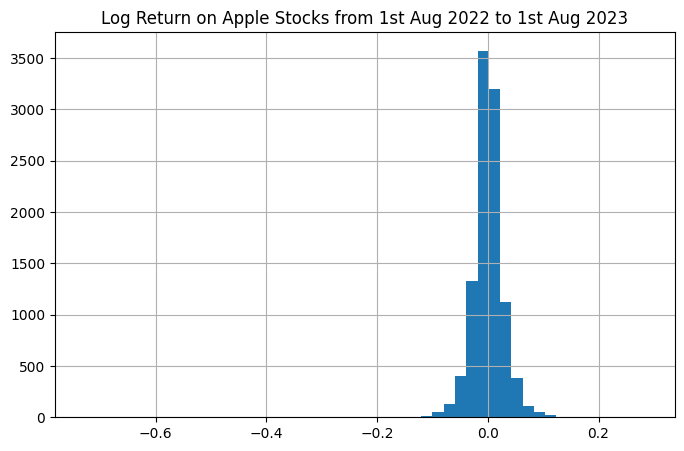

In [44]:
plt.figure(figsize=(8,5))
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
df['LogReturn'].hist(bins=50)
plt.title('Log Return on Apple Stocks from 1st Aug 2022 to 1st Aug 2023')
plt.show()

In [45]:
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)
print(mu, sigma)

0.0006929734350073612 0.028803431456525887


In [46]:
mu220 = 220 * mu
sigma220 = 220**0.5*sigma

print(f'Normal Distribution of dropping over 40% in 220 days is {norm.cdf(-0.4, mu220, sigma220)}')

Normal Distribution of dropping over 40% in 220 days is 0.09798382922870685


In [47]:
norm.ppf(0.05, mu, sigma)

-0.04668445526490739

Sampling form a normal distribution

In [48]:
mySample = pd.DataFrame(np.random.normal(10, 5, size=30))
print(f'Sample mean is {mySample[0].mean()}')
print(f'Sample standard deviation is {mySample[0].std(ddof=1)}')

Sample mean is 7.743850877479593
Sample standard deviation is 3.288989585384127


Emperical Distribution of sample mean and variance

<Axes: >

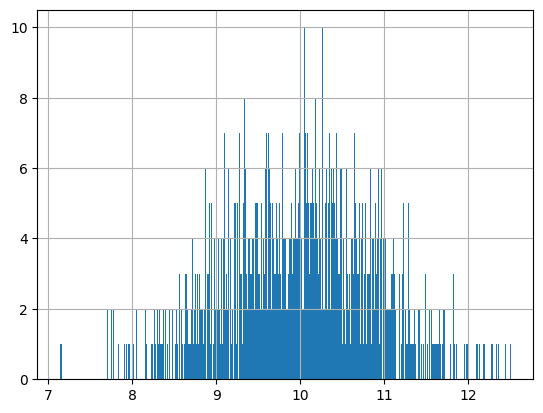

In [49]:
meanlist = []
varlist = []
for t in range(1000):
  new_sample = pd.DataFrame(np.random.normal(10, 5, size=30))
  meanlist.append(new_sample[0].mean())
  varlist.append(new_sample[0].var(ddof=1))

myCollection = pd.DataFrame()
myCollection['meanlist'] = meanlist
myCollection['varlist'] = varlist

myCollection['meanlist'].hist(bins=500)

<Axes: >

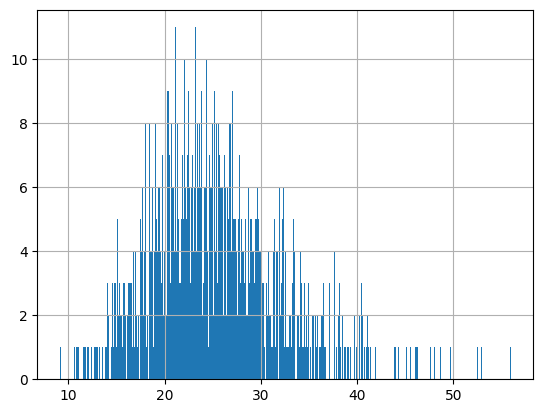

In [50]:
myCollection['varlist'].hist(bins=500)

<Axes: >

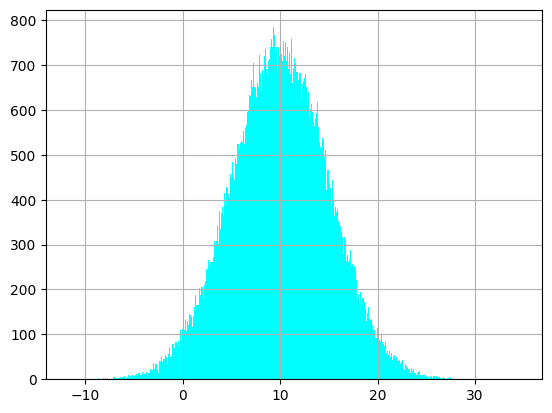

In [51]:
pop = pd.DataFrame(np.random.normal(10, 5, size=100000))

pop[0].hist(bins=500, color='cyan')


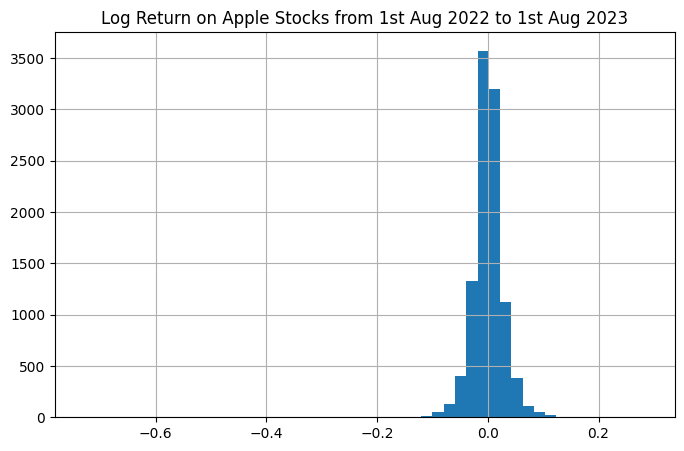

In [52]:
plt.figure(figsize=(8,5))
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
df['LogReturn'].hist(bins=50)
plt.title('Log Return on Apple Stocks from 1st Aug 2022 to 1st Aug 2023')
plt.show()

In [53]:
df.shape

(10409, 7)

### Confidence Interval for Daily Return

Values for calculating %80 confidence interval

In [54]:
from decimal import ROUND_DOWN
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

sample_mean = df['LogReturn'].mean()
sample_std = df['LogReturn'].std(ddof=1)/(df.shape[0]**0.5)

interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean+ z_right * sample_std

print(f'Sample mean is {sample_mean}')
print(f'*'* 80)
print(f'%80 Confidence interval is\
{interval_left} left & {interval_right} right')

Sample mean is 0.0006929734350073612
********************************************************************************
%80 Confidence interval is0.0003311673963183763 left & 0.001054779473696346 right


### __Housing Data Summary__

There are 14 attributes in each case of the dataset. They are:

$CRIM$ - per capita crime rate by town

$ZN$ - proportion of residential land zoned for lots over 25,000 sq.ft.

$INDUS$ - proportion of non-retail business acres per town.

$CHAS$ - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

$NOX$ - nitric oxides concentration (parts per 10 million)

$RM$ - average number of rooms per dwelling

$AGE$ - proportion of owner-occupied units built prior to 1940

$DIS$ - weighted distances to five Boston employment centres

$RAD$ - index of accessibility to radial highways

$TAX$ - full-value property-tax rate per 10,000

$PTRATIO$ - pupil-teacher ratio by town

$B$ - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town

$LSTAT$ - % lower status of the population

$MEDV$ - Median value of owner-occupied homes in $1000's


https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass.

In [55]:
hsd = pd.read_csv('./Data/HousingData.csv')
hsd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [56]:
hsd.shape

(506, 14)

In [57]:
hd = hsd.dropna()

$LSTAT$ - % lower status of the population

$INDUS$ - proportion of non-retail business acres per town.

$NOX$ - nitric oxides concentration (parts per 10 million)

$RM$ - average number of rooms per dwelling

$MEDV$ - Median value of owner-occupied homes in $1000's



In [58]:
hd = hd.loc[0:,['LSTAT','INDUS','NOX','RM','MEDV']]
hd.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
5,5.21,2.18,0.458,6.430,28.7


In [59]:
hd.shape

(394, 5)

In [60]:
# Use covariance to calculate the association
hd.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,53.413156,30.200469,0.490760,-3.245500,-49.677919
INDUS,30.200469,47.725488,0.596019,-1.943568,-32.265515
NOX,0.490760,0.596019,0.012794,-0.024993,-0.474747
RM,-3.245500,-1.943568,-0.024993,0.487183,4.620009
MEDV,-49.677919,-32.265515,-0.474747,4.620009,83.594067


In [61]:
# Use correlation to calculate the association is more appropriate in this case
hd.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.598156,0.593655,-0.636226,-0.743450
INDUS,0.598156,1.000000,0.762737,-0.403068,-0.510829
NOX,0.593655,0.762737,1.000000,-0.316563,-0.459054
RM,-0.636226,-0.403068,-0.316563,1.000000,0.723951
MEDV,-0.743450,-0.510829,-0.459054,0.723951,1.000000


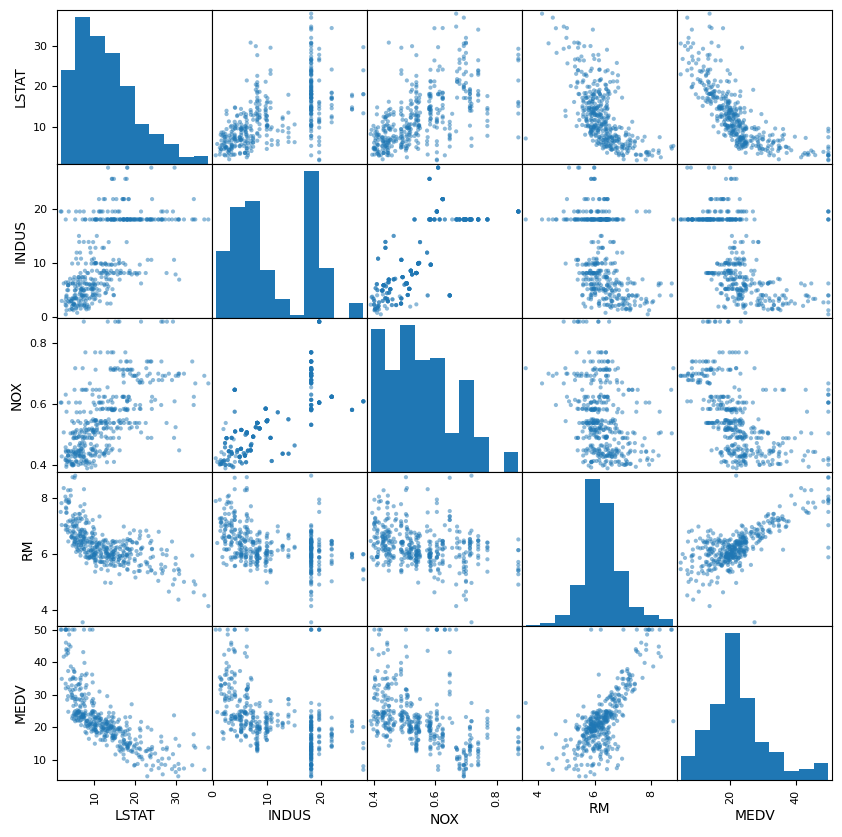

In [62]:
# scatter matrix plot

from pandas.plotting import scatter_matrix
sm = scatter_matrix(hd, figsize=(10, 10))

<Axes: xlabel='MEDV', ylabel='RM'>

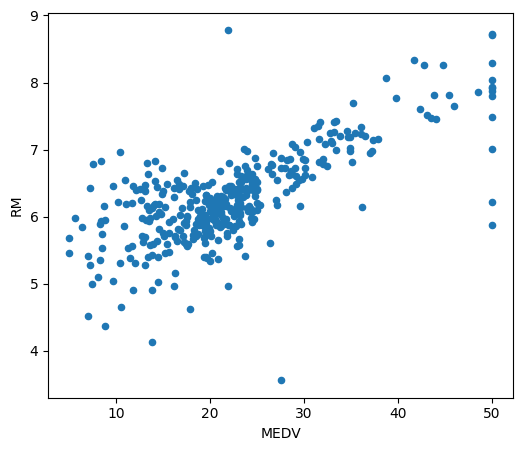

In [63]:
# This time we take a closer look at MEDV vs RM What is the association between MEDV and RM you observed?
hd.plot(kind='scatter', x='MEDV', y='RM', figsize=(6, 5))

<Axes: xlabel='MEDV', ylabel='LSTAT'>

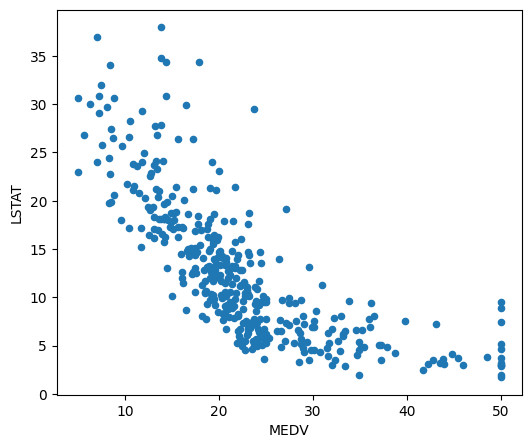

In [64]:
# This time we take a closer look at MEDV vs LSTAT What is the association between MEDV and LSTAT you observed?
hd.plot(kind='scatter', x='MEDV', y='LSTAT', figsize=(6, 5))

### Simple linear regression

Population Model

$ y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

Mean Equation

$ y_i = \beta_0 + \beta_1 * x_i $

### We shall base on the association between LSTAT and MEDV and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)

In [65]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data

b0 = 0.1
b1 = 1
hd['GuessResponse'] = b0 + b1*hd['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response

hd['observederror'] = hd['MEDV'] - hd['GuessResponse']

In [66]:
hd.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observederror
0,4.98,2.31,0.538,6.575,24.0,6.675,17.325
1,9.14,7.07,0.469,6.421,21.6,6.521,15.079
2,4.03,7.07,0.469,7.185,34.7,7.285,27.415
3,2.94,2.18,0.458,6.998,33.4,7.098,26.302
5,5.21,2.18,0.458,6.430,28.7,6.530,22.170


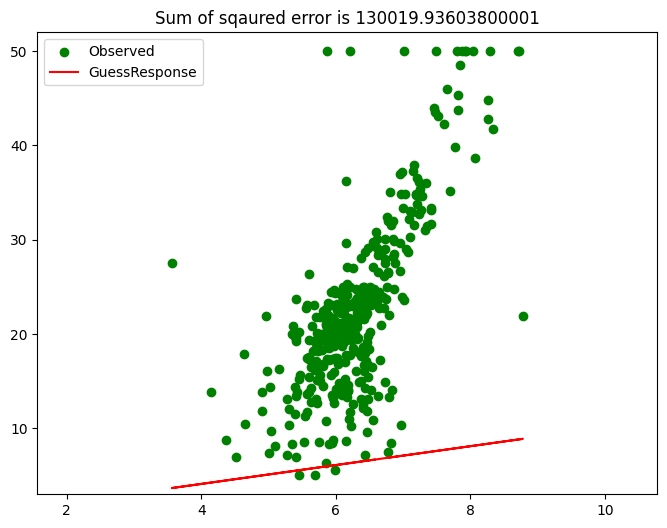

In [67]:
# plot your estimated line together with the points
plt.figure(figsize=(8, 6))
plt.title('Sum of sqaured error is {}'\
          .format((((hd['observederror'])**2)).sum()))
plt.scatter(hd['RM'], hd['MEDV'], color='g', label='Observed')
plt.plot(hd['RM'], hd['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(hd['RM'].min()-2, hd['RM'].max()+2)
plt.ylim(hd['MEDV'].min()-2, hd['MEDV'].max()+2)
plt.show()

In [68]:
# Input the formula (refer to the lecture video 4.3)

import statsmodels.formula.api as smf

formula = 'MEDV~RM'

model = smf.ols(formula=formula, data=hd).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

hd['BestResponse'] = b0_ols + b1_ols*hd['RM']

# Also want to know the error of of guess...
hd['error'] = hd['MEDV'] - hd['BestResponse']


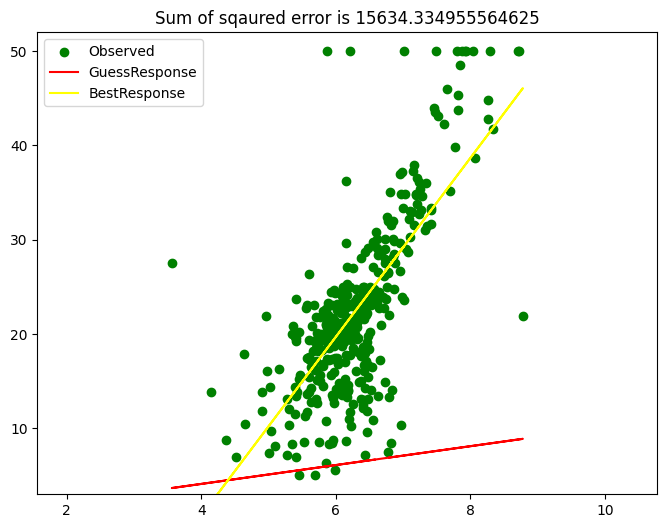

In [69]:
# plot your estimated line together with the points
plt.figure(figsize=(8, 6))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((hd['error'])**2)).sum()))
plt.scatter(hd['RM'], hd['MEDV'], color='g', label='Observed')
plt.plot(hd['RM'], hd['GuessResponse'], color='red', label='GuessResponse')
plt.plot(hd['RM'], hd['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(hd['RM'].min()-2, hd['RM'].max()+2)
plt.ylim(hd['MEDV'].min()-2, hd['MEDV'].max()+2)
plt.show()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     431.7
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           3.44e-65
Time:                        11:39:33   Log-Likelihood:                -1284.2
No. Observations:                 394   AIC:                             2572.
Df Residuals:                     392   BIC:                             2580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.1944      2.884    -12.897      0.000     -42.864     -31.525
RM             9.4831      0.456     20.778      0.000       8.586      10.380
==============================================================================
Omnibus:                       55.979   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.623
Skew:                           0.397   Prob(JB):                     3.23e-71
Kurtosis:                       7.375   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
hd.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observederror,BestResponse,error
0,4.98,2.31,0.538,6.575,24.0,6.675,17.325,25.157017,-1.157017
1,9.14,7.07,0.469,6.421,21.6,6.521,15.079,23.696619,-2.096619
2,4.03,7.07,0.469,7.185,34.7,7.285,27.415,30.941714,3.758286
3,2.94,2.18,0.458,6.998,33.4,7.098,26.302,29.168373,4.231627
5,5.21,2.18,0.458,6.430,28.7,6.530,22.170,23.781967,4.918033


In [72]:
model = smf.ols(formula='MEDV~LSTAT', data=hd).fit()

# Here are estimated intercept and slope by least square estimation
b0_ols = model.params[0]
b1_ols = model.params[1]

hd['BestResponse'] = b0_ols + b1_ols*hd['LSTAT']

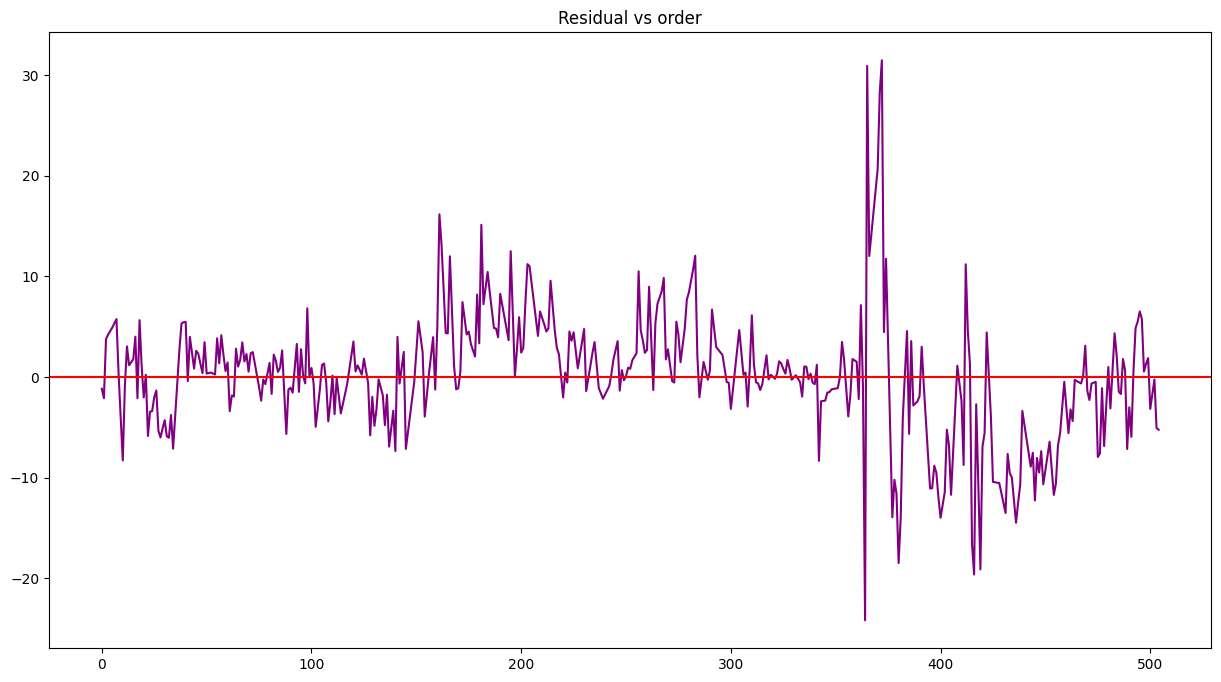

In [73]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(hd.index, hd['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [74]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     484.4
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           1.77e-70
Time:                        11:41:07   Log-Likelihood:                -1272.0
No. Observations:                 394   AIC:                             2548.
Df Residuals:                     392   BIC:                             2556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2358      0.622     55.082      0.000      33.014      35.458
LSTAT         -0.9301      0.042    -22.009      0.000      -1.013      -0.847
==============================================================================
Omnibus:                      118.775   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.397
Skew:                           1.551   Prob(JB):                     1.42e-58
Kurtosis:                       5.571   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

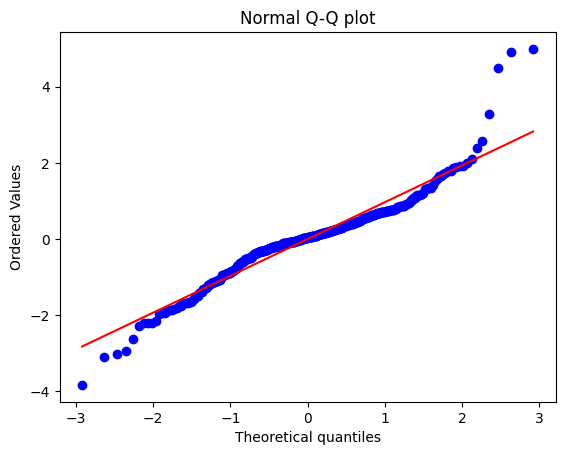

In [75]:
import scipy.stats as stats

z = (hd['error'] - hd['error'].mean())/hd['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

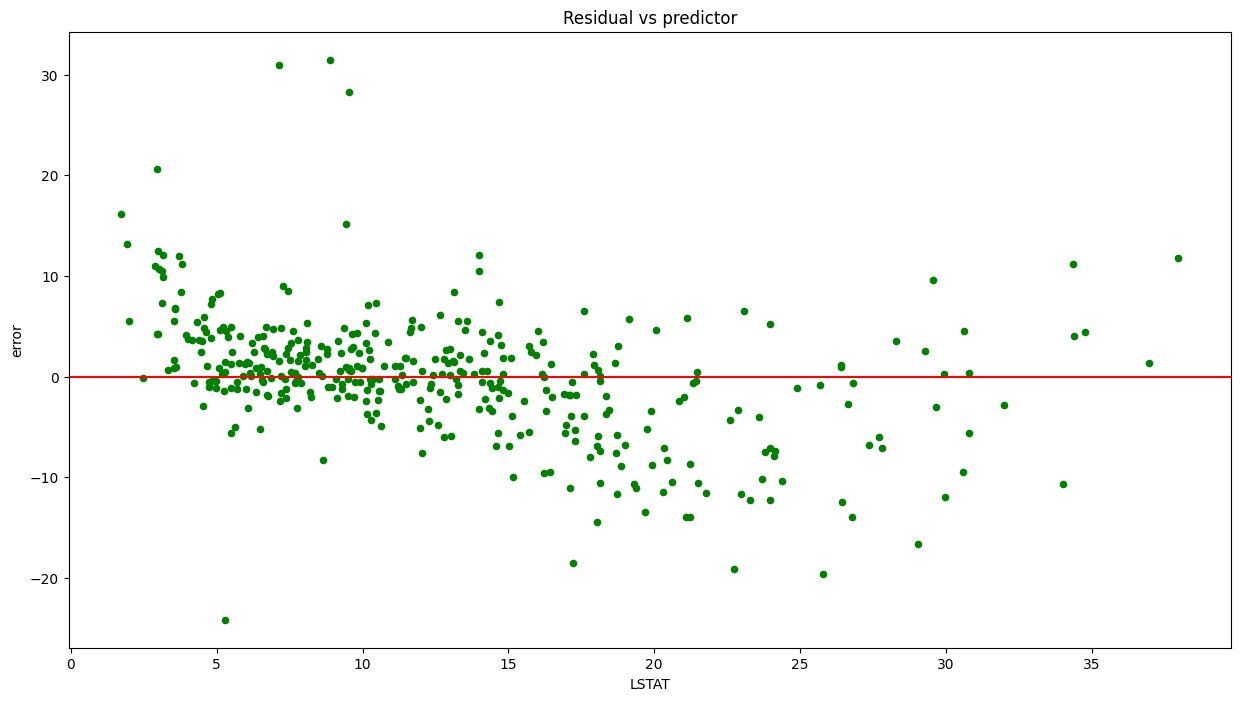

In [76]:
# Residual vs predictor plot
hd.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()